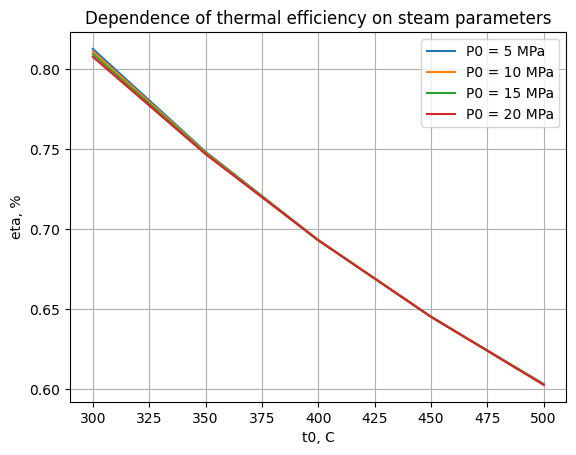

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Заданные параметры
P0_values = [5, 10, 15, 20]              # P0, MPa
tk_values = [300, 350, 400, 450, 500]   # t0, C
Pk = 5                                  # Pk, kPa

# Константы
R = 8.314           # универсальная газовая постоянная, Дж/(моль*К)
mdot = 1           # массовый расход, кг/с
eta_m = 0.8        # механический КПД
sigma_t = 0.85     # тепловой КПД турбины

# Функция расчета термического КПД паротурбинного цикла без промежуточного перегрева пара
def thermal_efficiency(t0, P0):
    T0 = t0 + 273.15                        # температура пара на входе в турбину, К
    P1=P0*10**6                             # давление на входе в турбину, Па
    cp = 2568.7 + 2.1*t0/1000              # удельная теплоемкость пара при постоянном давлении, Дж/(кг*К)
    h1 = cp*T0                              # энтальпия на входе в турбину, Дж/кг
    P2 = Pk*1000                            # давление на выходе из турбины, Па
    s2 = 7.5 + 0.0145*t0 - 9865/(t0+273.15) # удельная энтропия на выходе из турбины, Дж/(кг*К)

    # Рассчитываем термический КПД цикла
    h3 = h4 = h1
    s3 = S3 = s2
    T3s = 686.4 # температура точки росы на выходе из турбины, К
    h5 = 337563 # энтальпия на входе в конденсатор, Дж/кг
    q12 = h1 - h2(P1, s2)
    q23 = cp*(T3s-T0)
    q34 = h3 - h4
    q45 = h5 - h4
    eta_th = (q12 + q23 + q34)/q12

    return eta_th * sigma_t * eta_m

# Функция для расчета энтальпии на выходе из турбины
def h2(P1, s2):
    h2 = (291735.3 + 3723.516*P1/10**6 - 3231.09*(P1/10**6)**2 + 1.02668e-4*(P1/10**6)**3
          + 0.158716*P1*s2 - 4.42392e-4*(P1/10**6)*s2**2 + 1.20347e-5*(P1/10**6)**2*s2**2
          - 1.31956e-7*(P1/10**6)**3*s2**2)*4.184/1000
    return h2

# Создаем график
fig, ax = plt.subplots()

# Рассчитываем значения термического КПД
for P0 in P0_values:
    eta_th_values = []
    for t0 in tk_values:
        eta_th = thermal_efficiency(t0, P0)
        eta_th_values.append(eta_th)
    
    # Строим график
    ax.plot(tk_values, eta_th_values, label=f'P0 = {P0} MPa')

# Настраиваем график
ax.set_xlabel('t0, C')
ax.set_ylabel('eta, %')
ax.set_title('Dependence of thermal efficiency on steam parameters')
ax.legend()
ax.grid()

# Показываем график
plt.show()